In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import os, random
import sys
sys.path.append('../')
import astropy

from data import KMTData
from data import OGLEData

random.seed(42)

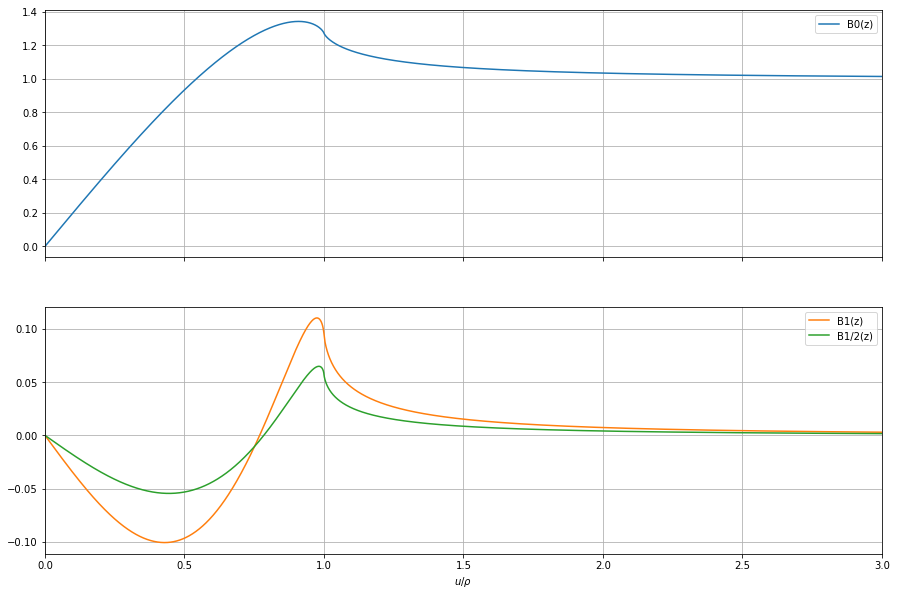

In [3]:
data = np.genfromtxt('Yoo_B0B1.dat')

fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)
ax[0].plot(data[:, 0], data[:, 1], label='B0(z)', color='C0')
ax[1].plot(data[:, 0], data[:, 2], label='B1(z)', color='C1')
ax[1].plot(data[:, 0], data[:, 3], label='B1/2(z)', color='C2')

ax[1].set_xlabel(r'$u/\rho$')

for a in ax.ravel():
    a.grid()
    a.set_xlim(0, 3)
    a.legend()

In [4]:
z = data[:, 0]
B0 = data[:, 1]
B1 = data[:, 2]
B12 = data[:, 3]

In [8]:
x_ = np.linspace(z[0], z[-1], 10000)
B0_ = np.interp(x_, z, B0)
B1_ = np.interp(x_, z, B1)
B12_ = np.interp(x_, z, B12)

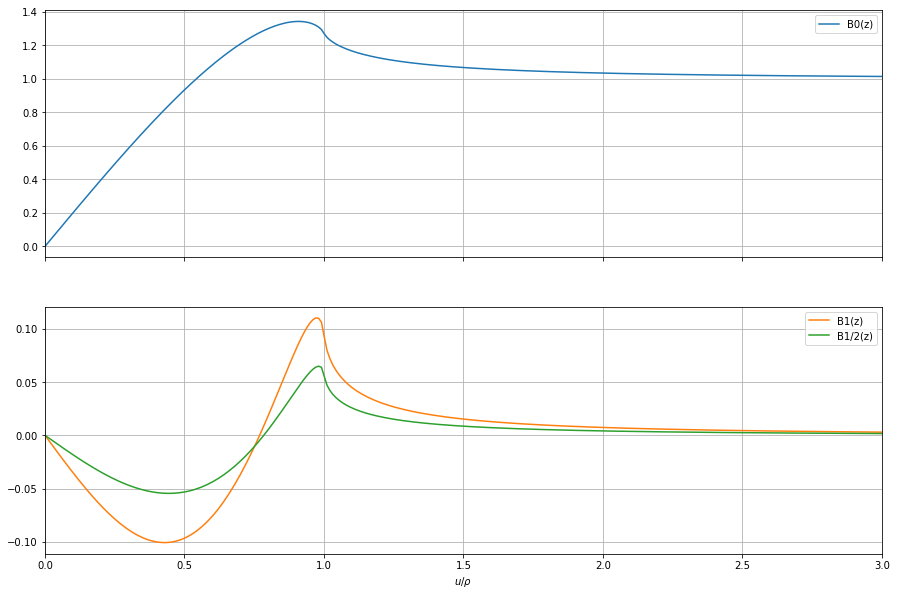

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)
ax[0].plot(x_, B0_, label='B0(z)', color='C0')
ax[1].plot(x_, B1_, label='B1(z)', color='C1')
ax[1].plot(x_, B12_, label='B1/2(z)', color='C2')

ax[1].set_xlabel(r'$u/\rho$')

for a in ax.ravel():
    a.grid()
    a.set_xlim(0, 3)
    a.legend()

In [24]:
np.save('FSPL_table.npy', np.stack([x_, B0_, B1_, B12_]).T)

# Interpolate with pyMC3

In [28]:
data = np.load('FSPL_table.npy')
z = data[:, 0]
B0 = data[:, 1]

In [29]:
import exoplanet as xo

points = [z]
values = B0

print(len(points[0]))
print(len(values))
print(type(points[0]))
print(type(values))
print(np.shape(points))
print(np.shape(values))
print(points)
print(values)

# x = np.sort(np.random.uniform(-5, 5, 25))
# points = [x]
# values = x**3-x**2
interpolator = xo.interp.RegularGridInterpolator(points, values[:, None])

x_ = np.linspace(0, 4, 501)

print(interpolator.evaluate(x_[:, None]).eval())

# plt.plot(t, interpolator.evaluate(t[:, None]).eval(), label="interpolation")
# plt.plot(x, values, "o", label="control points")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend(fontsize=12);

10000
10000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1, 10000)
(10000,)
[array([  1.00000000e-03,   1.09988265e-02,   2.09976530e-02, ...,
         9.99592683e+01,   9.99692671e+01,   9.99792659e+01])]
[ 0.002       0.02199698  0.04199068 ...,  1.00001251  1.00001251
  1.00001251]
[[  6.69879113e-08]
 [  1.59995311e-02]
 [  3.19973501e-02]
 [  4.79922887e-02]
 [  6.39831415e-02]
 [  7.99674889e-02]
 [  9.59432086e-02]
 [  1.11910035e-01]
 [  1.27866759e-01]
 [  1.43812170e-01]
 [  1.59742650e-01]
 [  1.75656031e-01]
 [  1.91553245e-01]
 [  2.07433073e-01]
 [  2.23294297e-01]
 [  2.39132071e-01]
 [  2.54944158e-01]
 [  2.70732713e-01]
 [  2.86496494e-01]
 [  3.02234255e-01]
 [  3.17939940e-01]
 [  3.33611164e-01]
 [  3.49251337e-01]
 [  3.64859192e-01]
 [  3.80433456e-01]
 [  3.95966806e-01]
 [  4.11456705e-01]
 [  4.26907840e-01]
 [  4.42318903e-01]
 [  4.57688582e-01]
 [  4.73008255e-01]
 [  4.88275181e-01]
 [  5.03495367e-01]
 [  5.18667458e-01]
 [  5.33790092e-01]
 [  5.4885